In [4]:

import numpy as np
import scipy
import matplotlib.pyplot as plt
import csv
import ast
import webbrowser
import time as clock
import PIL as pillow

from scipy.interpolate import interp1d

In [5]:
def weighted_mean(val, err):
    values = np.array(val)
    errors = np.array(err)

    weights = 1 / (errors**2)
    weighted_mean = np.sum(weights * values) / np.sum(weights)
    weighted_mean_error = np.sqrt(1 / np.sum(weights))
    
    return weighted_mean, weighted_mean_error

[0.0019898  0.00994901 0.01828131 0.02686233 0.03817933 0.04663599
 0.05944534 0.067902   0.08605895 0.09700286]
[0.00203698 0.01190849 0.02287684 0.03525541 0.04951426 0.06016923
 0.07035412 0.09307427 0.10357255 0.11924162]
[0.00203528 0.01605608 0.03618272 0.05314337 0.07327001 0.08887381
 0.11103573 0.13500678 0.14993216 0.17616463]


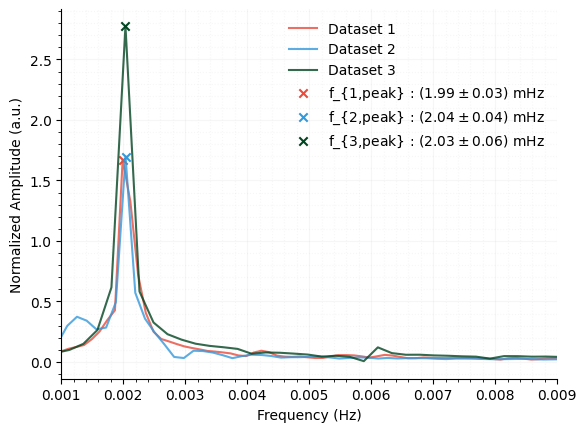

In [ ]:


def generate_synthetic_spectrum(freq_1, fft_signal_1, freq_2, fft_signal_2, noise_scale=0.5):
    # Interpolate signal 2 onto freq_1's grid
    interp_fft2 = interp1d(freq_2, fft_signal_2, bounds_error=False, fill_value=0)
    fft_signal_2_interp = interp_fft2(freq_1)

    # Average the two and add custom noise
    peak_signal = (fft_signal_1 + fft_signal_2_interp) / 2
    noise = np.random.normal(0, np.std(peak_signal) * noise_scale, size=peak_signal.shape)

    return peak_signal + noise

# with open(r"Position of circles\fifth_video_dot_pos.txt", 'r') as file:
#     found_circles_3 = [ast.literal_eval(line.strip()) for line in file]
#     total_time_3 = [i/30 for i in range(len(found_circles_3))] # sixth total_frames : 196157 seventh total_frames : 243569
# found_circles_3 = np.asarray(found_circles_3)


with open(r"Position of circles\test_8_v3.txt", 'r') as file:
    found_circles_3 = [ast.literal_eval(line.strip()) for line in file]
    total_time_3 = [i/30 for i in range(len(found_circles_3))] # sixth total_frames : 196157 seventh total_frames : 243569
found_circles_3 = np.asarray(found_circles_3)

with open(r"Position of circles\test_7.txt", 'r') as file:
    found_circles = [ast.literal_eval(line.strip()) for line in file]
    total_time = [i/30 for i in range(len(found_circles))] # sixth total_frames : 196157 seventh total_frames : 243569
found_circles = np.asarray(found_circles)


with open(r"Position of circles\test_6.txt", 'r') as file:
    found_circles_2 = [ast.literal_eval(line.strip()) for line in file]
    total_time_2 = [i/30 for i in range(len(found_circles_2))] # sixth total_frames : 196157 seventh total_frames : 243569
found_circles_2 = np.asarray(found_circles_2)

time_3, planar_disp_3, displacement_err_3 = [], [], []
temp_t_3, temp_x_3, temp_err_3 = [], [], []
i = 0
while i < len(found_circles_3):
    if found_circles_3[i][0] == None :
        i+=1
        continue
    temp_x_3.append(found_circles_3[i,0])
    temp_t_3.append(total_time_3[i])
    temp_err_3.append(found_circles_3[i,2])

    if i%30 == 0:
        
        x_mean_3, x_err_3 = weighted_mean(temp_x_3, temp_err_3)
        t_mean_3 = np.mean(temp_t_3)
        temp_t_3, temp_x_3, temp_err_3 = [], [], []
        time_3.append(t_mean_3)
        planar_disp_3.append(x_mean_3)
        displacement_err_3.append(x_err_3)
    i+= 1

time, planar_disp, displacement_err = [], [], []
temp_t, temp_x, temp_err = [], [], []
i = 0
while i < len(found_circles):
    if found_circles[i][0] == None :
        i+=1
        continue
    temp_x.append(found_circles[i,0])
    temp_t.append(total_time[i])
    temp_err.append(found_circles[i,2])

    if i%30 == 0:
        
        x_mean, x_err = weighted_mean(temp_x, temp_err)
        t_mean = np.mean(temp_t)
        temp_t, temp_x, temp_err = [], [], []
        time.append(t_mean)
        planar_disp.append(x_mean)
        displacement_err.append(x_err)
    i+= 1


time_2, planar_disp_2, displacement_err_2 = [], [], []
temp_t_2, temp_x_2, temp_err_2 = [], [], []
i = 0
while i < len(found_circles_2):
    if found_circles_2[i][0] == None :
        i+=1
        continue
    temp_x_2.append(found_circles_2[i,0])
    temp_t_2.append(total_time_2[i])
    temp_err_2.append(found_circles_2[i,2])

    if i%30 == 0:
        
        x_mean_2, x_err_2 = weighted_mean(temp_x_2, temp_err_2)
        t_mean_2 = np.mean(temp_t_2)
        temp_t_2, temp_x_2, temp_err_2 = [], [], []
        time_2.append(t_mean_2)
        planar_disp_2.append(x_mean_2)
        displacement_err_2.append(x_err_2)
    i+= 1

# #### Fourier transform of the signal to find the period ######
fft_signal = np.abs(scipy.fft.rfft(planar_disp))
fft_freq = scipy.fft.rfftfreq(len(time), d=30/(30)) 

fft_signal_2 = np.abs(scipy.fft.rfft(planar_disp_2))
fft_freq_2 = scipy.fft.rfftfreq(len(time_2), d=30/(30)) 

fft_signal_3 = np.abs(scipy.fft.rfft(planar_disp_3))
fft_freq_3 = scipy.fft.rfftfreq(len(time_3), d=30/(30)) 



idx_max, _ = scipy.signal.find_peaks(fft_signal, threshold = 100, distance = 60, prominence = 10) # this finds the peaks in fourier space
idx_max_2, _ = scipy.signal.find_peaks(fft_signal_2, threshold = 40, distance = 60, prominence = 7) # this finds the peaks in fourier space
idx_max_3, _ = scipy.signal.find_peaks(fft_signal_3, threshold = 40, distance = 60, prominence = 7) # this finds the peaks in fourier space
print(fft_freq[idx_max][:10])
print(fft_freq_2[idx_max_2][:10])
print(fft_freq_3[idx_max_3][:10])

fig = plt.figure()
ax = plt.gca()  # get current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.minorticks_on()
ax.grid(visible=True, which='major', alpha=0.1)
ax.grid(visible=True, which='minor', linestyle=':', alpha=0.1)
# ax.axvline(4610, label = r'$f_L$ = 4610 Hz', linestyle=':', co
plt.plot(fft_freq[5:], 3.5*fft_signal[5:] / (len(found_circles)/2), color = '#E74C3C', label = 'Dataset 1', alpha = 0.8)
plt.plot(fft_freq_2[5:], 2*fft_signal_2[5:] / len(found_circles_2), color = '#3498DB', label = 'Dataset 2', alpha = 0.8)
plt.plot([x for x in fft_freq_3[2:]], 2*fft_signal_3[2:] / len(found_circles_3), color = '#014421', label = 'Dataset 3', alpha = 0.8)


plt.scatter(fft_freq[idx_max], 3.5*fft_signal[idx_max] / (len(found_circles)/2), color = '#E74C3C', marker = 'x', label= r'f_{1,peak} : $(1.99 \pm 0.03)$ mHz')
plt.scatter(fft_freq_2[idx_max_2], 2*fft_signal_2[idx_max_2] / len(found_circles_2), color = '#3498DB', marker = 'x', label= r'f_{2,peak} : $(2.04\pm 0.04)$ mHz')
plt.scatter([x for x in fft_freq_3[idx_max_3]], 2*fft_signal_3[idx_max_3] / len(found_circles_3), color = '#014421', marker = 'x', label= r'f_{3,peak} : $(2.03\pm 0.06)$ mHz')


plt.xlim(0.001, 0.009)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Amplitude (a.u.)')
ax.legend(frameon=False, fontsize='medium', loc=1)

In [24]:
print(weighted_mean([1.99, 2.04, 2.03], [0.03, 0.04, 0.06]))


(2.0110344827586206, 0.022283440581246223)
